In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans as sklKMeans
from sklearn.metrics import silhouette_score

In [20]:
data=pd.read_csv("C:/Users/mohan/Desktop/ML lab/datasets/iris.csv")
X=data[["sepal.lenght","petal.length"]]
X

,sepal.lenght,petal.length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [21]:
def kMeans(X,k):
    distrotion=[]
    for i in range(1,k+1):
        model=sklKMeans(n_clusters=i,init='random',n_init='auto',max_iter=10).fit(X.values)
        distrotion.append(model.inertia_)
    print(f"silhouette score of {k} cluster is {silhouette_score(X,model.labels_)}")
    return model,distrotion
k=5
model,distrotion=kMeans(X,k)

silhouette score of 5 cluster is 0.561680900952581


<Axes: xlabel='sepal.lenght', ylabel='petal.length'>

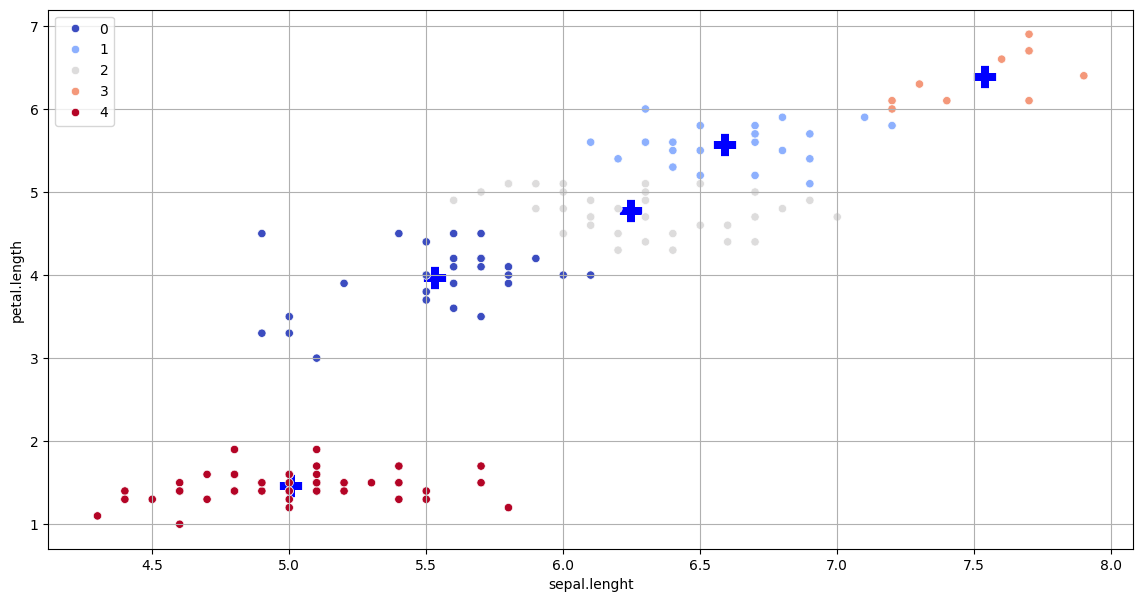

In [22]:
centrodis=model.cluster_centers_
index=model.labels_
plt.figure(figsize=(14,7))
plt.grid()
plt.scatter(x=centrodis[:,0],y=centrodis[:,1],marker='+',c='b',linewidth=16)
sns.scatterplot(data=data,x='sepal.lenght',y='petal.length',hue=index,palette='coolwarm')

Text(0, 0.5, 'distrotion')

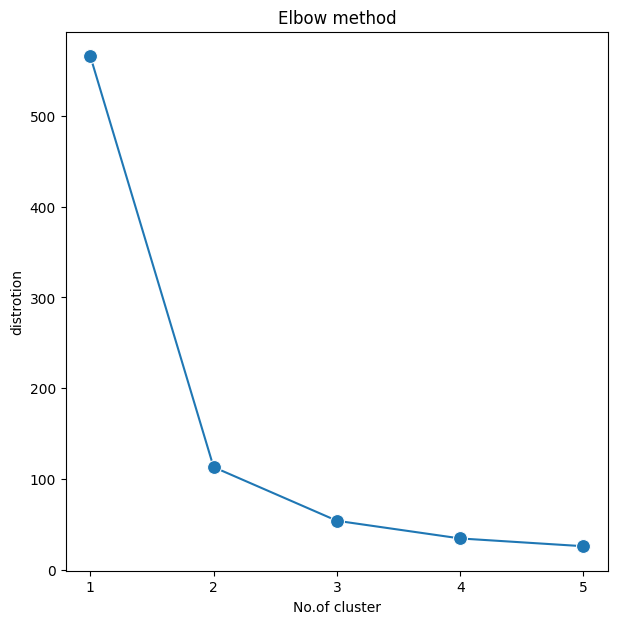

In [23]:
plt.figure(figsize=(7,7))
sns.lineplot(x=np.arange(1,k+1),y=np.array(distrotion),marker='o',markersize=10)
plt.xticks(np.arange(1,k+1))
plt.title("Elbow method")
plt.xlabel("No.of cluster")
plt.ylabel("distrotion")